In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('emotion.csv')
df2 = pd.read_csv('metadata.csv')
df3 = pd.read_csv('gaze.csv')

In [3]:
df1.head()

,movie_id,image_seq,angry,disgust,fear,happy,sad,surprise,neutral,dominant_emotion
0,93663f94-bf0a-4ce8-a29a-a5236cc7fe6a,0,4.31735,0.000594,2.879790,1.65035,2.779980,0.600814,87.77110,neutral
1,93663f94-bf0a-4ce8-a29a-a5236cc7fe6a,1,53.22530,2.981640,12.736800,1.52347,1.051320,27.216800,1.26462,angry
2,93663f94-bf0a-4ce8-a29a-a5236cc7fe6a,2,8.79651,0.029468,2.968160,16.83150,39.884600,0.279335,31.21050,sad
3,93663f94-bf0a-4ce8-a29a-a5236cc7fe6a,3,9.45303,0.106778,1.553080,20.93010,3.503870,0.909426,63.54370,neutral
4,93663f94-bf0a-4ce8-a29a-a5236cc7fe6a,4,56.00020,0.000004,0.162231,5.58358,0.197026,12.807600,25.24940,angry


In [4]:
df1.describe()

,image_seq,angry,disgust,fear,happy,sad,surprise,neutral
count,87.000000,87.000000,8.700000e+01,87.000000,87.000000,87.000000,87.000000,87.000000
mean,45.390805,14.451059,6.168965e-01,18.382797,5.865318,13.575324,8.744969,38.363648
std,27.587643,18.544205,2.679399e+00,25.073562,11.237819,19.787221,19.621163,33.468718
min,0.000000,0.164384,2.400910e-10,0.079219,0.000005,0.000073,0.000008,0.000117
25%,22.500000,1.867450,8.769180e-05,1.862945,0.143215,1.845405,0.210637,8.035385
50%,44.000000,6.412790,3.443590e-03,6.366870,1.476330,5.578010,0.970922,28.221400
75%,68.500000,18.765500,6.486260e-02,21.010100,5.569355,14.056700,6.524355,71.227450
max,94.000000,71.172500,2.150890e+01,94.981800,66.222300,91.563600,97.834400,97.823000


In [5]:
df1.corr()

/tmp/ipykernel_4940/473017434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,image_seq,angry,disgust,fear,happy,sad,surprise,neutral
image_seq,1.000000,-0.088540,0.049183,0.178031,0.017837,0.226941,0.061869,-0.264686
angry,-0.088540,1.000000,-0.030151,-0.226684,-0.042435,-0.122666,0.049052,-0.323825
disgust,0.049183,-0.030151,1.000000,0.135674,0.093685,0.004282,-0.020750,-0.186817
fear,0.178031,-0.226684,0.135674,1.000000,-0.052387,-0.154630,-0.054493,-0.493469
happy,0.017837,-0.042435,0.093685,-0.052387,1.000000,-0.058035,-0.049472,-0.217198
sad,0.226941,-0.122666,0.004282,-0.154630,-0.058035,1.000000,-0.276290,-0.226286
surprise,0.061869,0.049052,-0.020750,-0.054493,-0.049472,-0.276290,1.000000,-0.390989
neutral,-0.264686,-0.323825,-0.186817,-0.493469,-0.217198,-0.226286,-0.390989,1.000000


In [6]:
df2.head()

,movie_id,image_seq,participant_id,elapsed_time,upload_time,distance
0,83c20b83-7881-499d-a40d-cc06b65869f8,0,70a013ed-120a-41fa-bedd-75a5d15afb76,1.0,2023-09-17 07:49:11,0.0
1,83c20b83-7881-499d-a40d-cc06b65869f8,1,70a013ed-120a-41fa-bedd-75a5d15afb76,2.0,2023-09-17 07:49:11,0.0
2,83c20b83-7881-499d-a40d-cc06b65869f8,2,70a013ed-120a-41fa-bedd-75a5d15afb76,3.0,2023-09-17 07:49:11,0.0
3,83c20b83-7881-499d-a40d-cc06b65869f8,3,70a013ed-120a-41fa-bedd-75a5d15afb76,4.0,2023-09-17 07:49:11,0.0
4,83c20b83-7881-499d-a40d-cc06b65869f8,4,70a013ed-120a-41fa-bedd-75a5d15afb76,5.0,2023-09-17 07:49:11,0.0


In [7]:
df3.head()

,movie_id,image_seq,gaze,blink,eye_offset
0,93663f94-bf0a-4ce8-a29a-a5236cc7fe6a,1,1,0,6.2253
1,93663f94-bf0a-4ce8-a29a-a5236cc7fe6a,2,1,0,22.7274
2,93663f94-bf0a-4ce8-a29a-a5236cc7fe6a,3,1,0,2.5704
3,93663f94-bf0a-4ce8-a29a-a5236cc7fe6a,4,1,0,21.1097
4,93663f94-bf0a-4ce8-a29a-a5236cc7fe6a,5,1,0,1.8453


In [8]:
df3 = df3.drop('blink',axis=1)

In [9]:
df3.corr()

/tmp/ipykernel_4940/3136175663.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3.corr()


,image_seq,gaze,eye_offset
image_seq,1.000000,0.151967,-0.038404
gaze,0.151967,1.000000,-0.732313
eye_offset,-0.038404,-0.732313,1.000000


In [10]:
df3.describe()

,image_seq,gaze,eye_offset
count,88.000000,88.000000,88.000000
mean,46.795455,0.625000,15.801362
std,27.690058,0.486897,17.858517
min,1.000000,0.000000,-33.465500
25%,23.750000,0.000000,0.293050
50%,45.500000,1.000000,19.694100
75%,70.250000,1.000000,28.332000
max,95.000000,1.000000,65.027600


## EDA Part 1 -
- The majority of observations (75th percentile) have a value of 1, suggesting that most of the time, the gaze is focused.
- The eye_offset values range from -33.4655 to 65.0276, with a mean of approximately 15.80
- This column represents the eye offset during the interview.
- There is a wide range of eye offset values, with some observations showing negative offsets.
- As suggested by chatgpt we added eye_offset and gaze column into df1 for analysing it's variation with respect to emotions

In [11]:
# gaze and eye_offset columns are added to df1 to analyse the variation of these with emotions
# Also adding elapsed_time column.
df1['gaze']= df3['gaze']
df1['eye_offset']=df3['eye_offset']
df1['elapsed_time']= df2['elapsed_time']

In [12]:
df1.columns

Index(['movie_id', 'image_seq', 'angry', 'disgust', 'fear', 'happy', 'sad',
       'surprise', 'neutral', 'dominant_emotion', 'gaze', 'eye_offset',
       'elapsed_time'],
      dtype='object')

In [13]:
df1.isnull().sum()

movie_id            0
image_seq           0
angry               0
disgust             0
fear                0
happy               0
sad                 0
surprise            0
neutral             0
dominant_emotion    0
gaze                0
eye_offset          0
elapsed_time        0
dtype: int64

In [14]:
df2.isnull().sum()

movie_id          0
image_seq         0
participant_id    0
elapsed_time      0
upload_time       0
distance          0
dtype: int64

In [15]:
df3.isnull().sum()

movie_id      0
image_seq     0
gaze          0
eye_offset    0
dtype: int64

In [16]:
df1.describe()

,image_seq,angry,disgust,fear,happy,sad,surprise,neutral,gaze,eye_offset,elapsed_time
count,87.000000,87.000000,8.700000e+01,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,45.390805,14.451059,6.168965e-01,18.382797,5.865318,13.575324,8.744969,38.363648,0.620690,15.711706,43.195402
std,27.587643,18.544205,2.679399e+00,25.073562,11.237819,19.787221,19.621163,33.468718,0.488028,17.942114,24.986433
min,0.000000,0.164384,2.400910e-10,0.079219,0.000005,0.000073,0.000008,0.000117,0.000000,-33.465500,1.000000
25%,22.500000,1.867450,8.769180e-05,1.862945,0.143215,1.845405,0.210637,8.035385,0.000000,0.194000,21.500000
50%,44.000000,6.412790,3.443590e-03,6.366870,1.476330,5.578010,0.970922,28.221400,1.000000,19.578700,43.000000
75%,68.500000,18.765500,6.486260e-02,21.010100,5.569355,14.056700,6.524355,71.227450,1.000000,28.500900,64.500000
max,94.000000,71.172500,2.150890e+01,94.981800,66.222300,91.563600,97.834400,97.823000,1.000000,65.027600,86.000000


In [17]:
df1.corr()

/tmp/ipykernel_4940/473017434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,image_seq,angry,disgust,fear,happy,sad,surprise,neutral,gaze,eye_offset,elapsed_time
image_seq,1.000000,-0.088540,0.049183,0.178031,0.017837,0.226941,0.061869,-0.264686,0.138960,-0.046387,0.999243
angry,-0.088540,1.000000,-0.030151,-0.226684,-0.042435,-0.122666,0.049052,-0.323825,0.014344,0.107192,-0.082417
disgust,0.049183,-0.030151,1.000000,0.135674,0.093685,0.004282,-0.020750,-0.186817,0.115033,-0.089880,0.049668
fear,0.178031,-0.226684,0.135674,1.000000,-0.052387,-0.154630,-0.054493,-0.493469,0.196038,-0.074853,0.178058
happy,0.017837,-0.042435,0.093685,-0.052387,1.000000,-0.058035,-0.049472,-0.217198,0.058810,-0.053856,0.024517
sad,0.226941,-0.122666,0.004282,-0.154630,-0.058035,1.000000,-0.276290,-0.226286,-0.009790,0.159619,0.226212
surprise,0.061869,0.049052,-0.020750,-0.054493,-0.049472,-0.276290,1.000000,-0.390989,-0.094054,0.012638,0.054599
neutral,-0.264686,-0.323825,-0.186817,-0.493469,-0.217198,-0.226286,-0.390989,1.000000,-0.122840,-0.079815,-0.265687
gaze,0.138960,0.014344,0.115033,0.196038,0.058810,-0.009790,-0.094054,-0.122840,1.000000,-0.739596,0.138695
eye_offset,-0.046387,0.107192,-0.089880,-0.074853,-0.053856,0.159619,0.012638,-0.079815,-0.739596,1.000000,-0.047793


In [18]:
df2 = df2.drop('distance',axis=1)

/tmp/ipykernel_4940/258561903.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(),annot = True)


<AxesSubplot: >

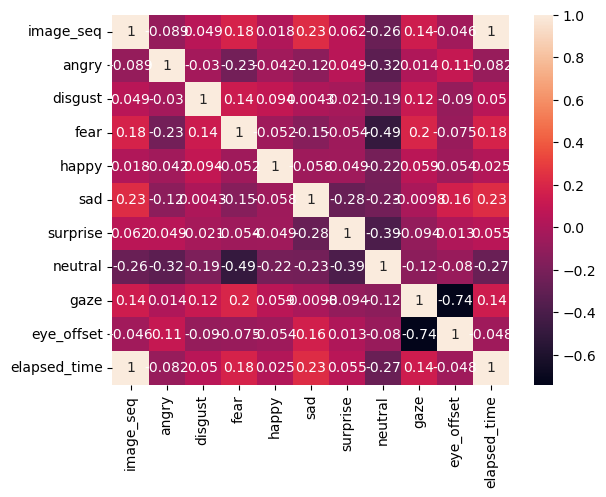

In [19]:
sns.heatmap(df1.corr(),annot = True)

In [20]:
df2.describe()

,image_seq,elapsed_time
count,91.00000,91.000000
mean,45.00000,45.186813
std,26.41338,26.150382
min,0.00000,1.000000
25%,22.50000,22.500000
50%,45.00000,45.000000
75%,67.50000,67.500000
max,90.00000,90.000000


In [21]:
df3.describe()

,image_seq,gaze,eye_offset
count,88.000000,88.000000,88.000000
mean,46.795455,0.625000,15.801362
std,27.690058,0.486897,17.858517
min,1.000000,0.000000,-33.465500
25%,23.750000,0.000000,0.293050
50%,45.500000,1.000000,19.694100
75%,70.250000,1.000000,28.332000
max,95.000000,1.000000,65.027600


In [22]:
df3['gaze'].value_counts()

1    55
0    33
Name: gaze, dtype: int64

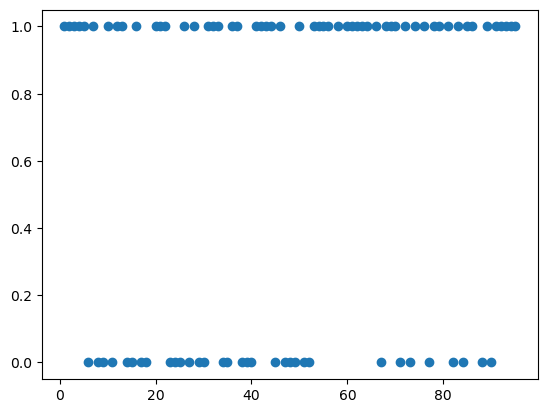

In [23]:
plt.scatter(df3['image_seq'],df3['gaze'])
plt.show()

In [24]:
df3.corr()

/tmp/ipykernel_4940/3136175663.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3.corr()


,image_seq,gaze,eye_offset
image_seq,1.000000,0.151967,-0.038404
gaze,0.151967,1.000000,-0.732313
eye_offset,-0.038404,-0.732313,1.000000


/tmp/ipykernel_4940/1713349441.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df3.corr(),annot = True)


<AxesSubplot: >

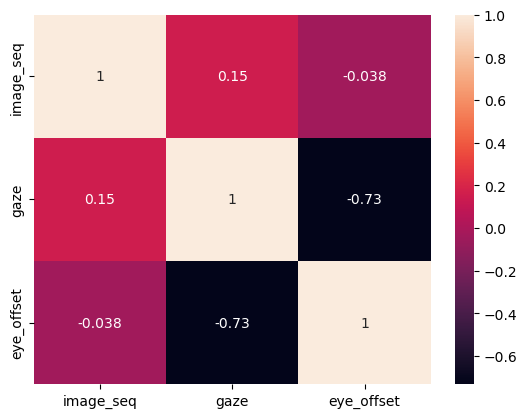

In [25]:
sns.heatmap(df3.corr(),annot = True)

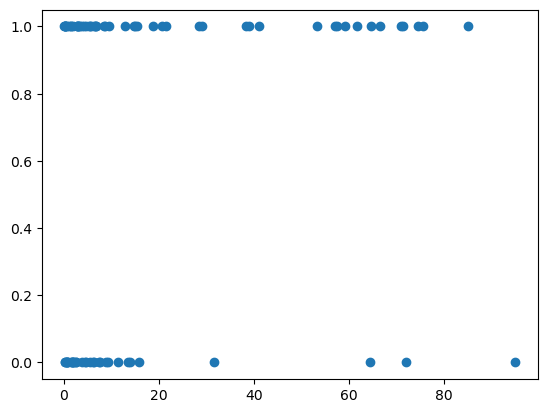

In [26]:
plt.scatter(df1['fear'],df1['gaze'])
plt.show()

In [27]:
var = pd.read_excel('Data Description.xlsx')

In [28]:
var

,Emotion data,Unnamed: 1
0,movie_id,Unique ID for a video
1,image_seq,Image number
2,angry,angry emotion score
3,disgust,disgust emotion score
4,fear,fear emotion score
5,happy,happy emotion score
6,sad,sad emotion score
7,surprise,surprise emotion score
8,neutral,neutral emotion score
9,dominant_emotion,dominant emotion among other emotions


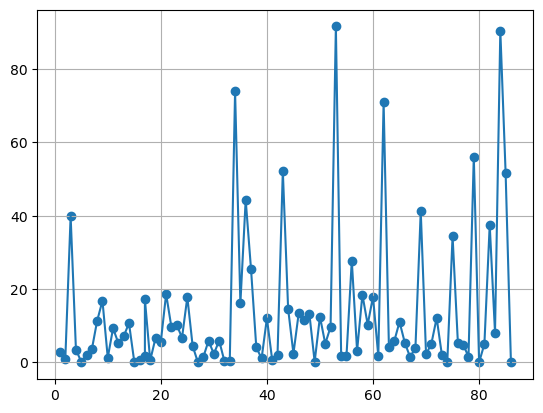

In [29]:
# line = Line2D(df1['stat'], df1['enthusiastic'])
plt.plot(df1['elapsed_time'],df1['sad'])
plt.scatter(df1['elapsed_time'],df1['sad'])
plt.grid()
plt.show()

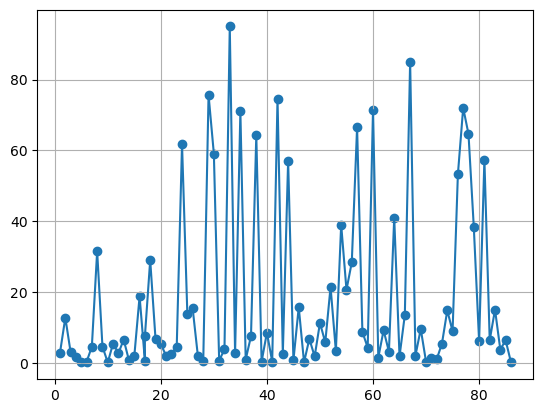

In [30]:
# line = Line2D(df1['stat'], df1['enthusiastic'])
plt.plot(df1['elapsed_time'],df1['fear'])
plt.scatter(df1['elapsed_time'],df1['fear'])
plt.grid()
plt.show()

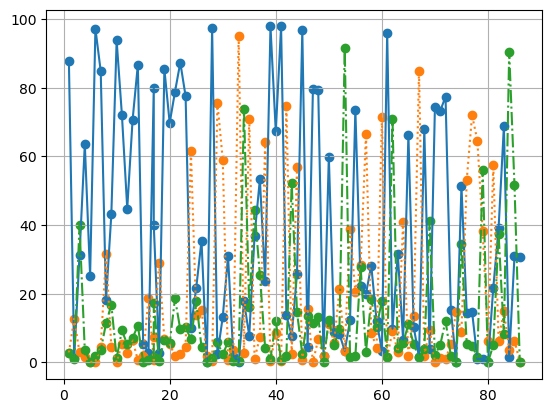

In [31]:
# line = Line2D(df1['stat'], df1['enthusiastic'])
plt.plot(df1['elapsed_time'],df1['neutral'], label = 'neutral')
plt.scatter(df1['elapsed_time'],df1['neutral'])
plt.plot(df1['elapsed_time'],df1['fear'], label = 'fear',linestyle=":")
plt.scatter(df1['elapsed_time'],df1['fear'])
plt.plot(df1['elapsed_time'],df1['sad'], label = 'sad',linestyle="-.")
plt.scatter(df1['elapsed_time'],df1['sad'])
plt.grid()
plt.show()

In [32]:
df1['dominant_emotion'].value_counts()

neutral     37
fear        19
angry       11
sad         10
surprise     7
happy        3
Name: dominant_emotion, dtype: int64

In [33]:
df1.columns

Index(['movie_id', 'image_seq', 'angry', 'disgust', 'fear', 'happy', 'sad',
       'surprise', 'neutral', 'dominant_emotion', 'gaze', 'eye_offset',
       'elapsed_time'],
      dtype='object')

<AxesSubplot: >

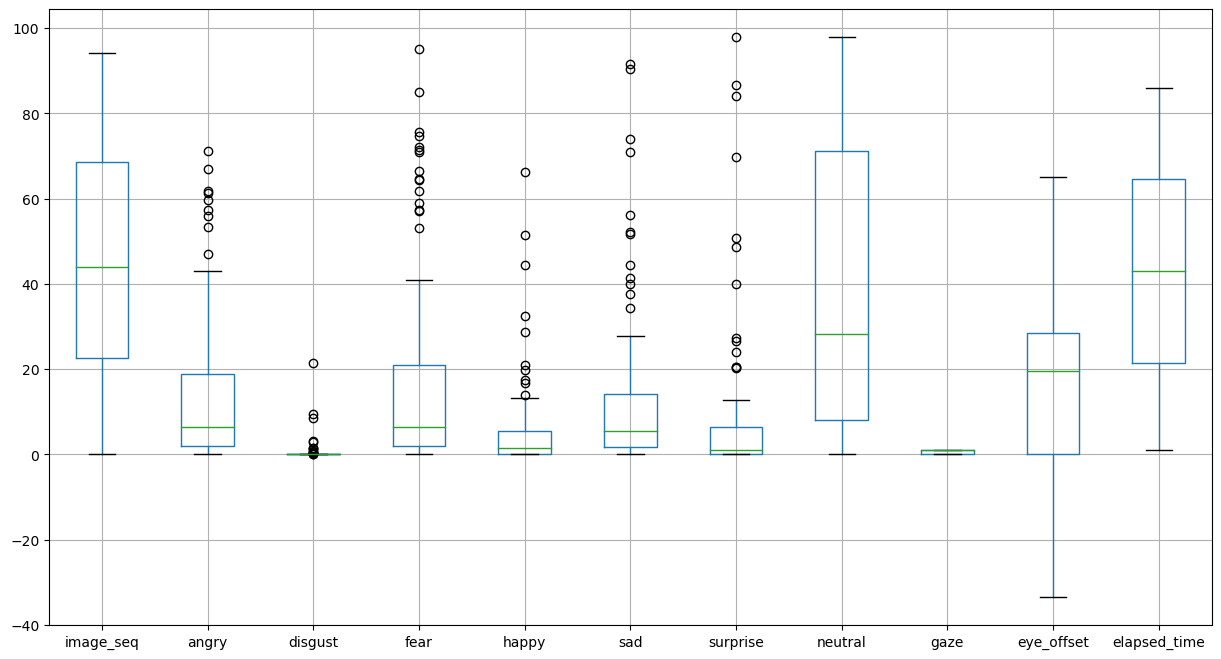

In [34]:
fig = plt.figure(figsize=(15,8))
df1.boxplot()

## EDA

- blink column has missing values, and all values are equal to 0, so this column can be dropped
- The strong negative correlation between gaze and eye_offset (-0.732) indicates that as one variable increases, the other tends to decrease, suggesting a strong inverse relationship. This might mean that when candidates gaze more, they have smaller eye offsets from a reference point (such as looking directly at the camera).
- The majority of observations of gaze (75th percentile) have a value of 1, suggesting that most of the time, the gaze is focused.
- The eye_offset values range from -33.4655 to 65.0276, with a mean of approximately 15.80
- As suggested by chatgpt we added eye_offset and gaze column into df1 for analysing it's variation with respect to emotions
- eye_offset has correlation of 0.16 with sad emotion, it is not that much but it shows that as candidate feels sad his eyes also moves away from camera.
- Also gaze has correaltion of 0.19 with fear emotion it tells us(and can also be seen from graph) that as candidate feels stressed(fear value is high) he looks at camera and doesn't move his eyes from camera.
- In the interview, the candidate seemed mostly calm and composed, but they occasionally showed signs of nervousness, anger, sadness, surprise, and relatively little happiness.

## Decision Making - Should we select this candidate

#### Based upon candidate's emotional behaviour during making this video, we can say that most of the time, candidate was in neutral state not angry, not sad, not fear and also not surprised. But collectively we can see that more than 50% time he was not in neutral state from this data, which is an important thing to notice. We can also see that candidate was focused (more than 75% times he was gazed and focused on camera), which is a good quality and increases his chances for being selected.

### As there are many points to be considered for selecting a candidate - so we can use weighted point method for selecting a candidate.

In [35]:
def calculate_candidate_score(happy_count, neutral_count, fear_count, sad_count, angry_count, surprise_count, good_gaze_count, bad_gaze_count):
    # Define weights for emotions
    emotion_weights = {
        'happy': 3,
        'neutral': 1,
        'fear': -3,
        'sad': -2,
        'angry': -1,
        'surprise' : -0.5
    }

    # Calculate the total number of emotions
    total_emotions = happy_count + neutral_count + fear_count + sad_count + angry_count + surprise_count

    # Calculate the emotion score
    emotion_score = (happy_count * emotion_weights['happy'] +
                     surprise_count * emotion_weights['surprise'] +
                     neutral_count * emotion_weights['neutral'] +
                     fear_count * emotion_weights['fear'] +
                     sad_count * emotion_weights['sad'] +
                     angry_count * emotion_weights['angry']) / total_emotions

    # Calculate the gaze score (multiply by 3 and divide by total emotions)
    gaze_score = ((good_gaze_count * 3) - (bad_gaze_count * 3)) / total_emotions

    # Calculate the overall score by summing emotion score and gaze score
    overall_score = emotion_score + gaze_score

    return overall_score




In [36]:
emotion_score = calculate_candidate_score(
    df1['dominant_emotion'].value_counts().get('happy', 0),
    df1['dominant_emotion'].value_counts().get('neutral', 0),
    df1['dominant_emotion'].value_counts().get('fear', 0),
    df1['dominant_emotion'].value_counts().get('sad', 0),
    df1['dominant_emotion'].value_counts().get('angry', 0),
    df1['dominant_emotion'].value_counts().get('surprise', 0),
    (df1['gaze'] == 1).sum(),
    (df1['gaze'] == 0).sum()
)

print('Emotion score for candidate 1 is ',emotion_score)

Emotion score for candidate 1 is  0.20114942528735635


### In the same way we can calculate this emotion score for other candidates and can set some constraint. Those candidates who passes this constraint as well as transcript score constraint, can be selected.